# Imports librairies et jeu de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import folium
import seaborn as sns
import numpy as np
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('sample.csv')

In [3]:
data.shape

(6000, 101)

In [4]:
data.dropna(inplace=True)

In [5]:
data.shape

(6000, 101)

In [6]:
data

,Unnamed: 0,customer_id,n_order,total_price,total_freight_value,payement_type_boleto,payement_type_credit_card,payement_type_debit_card,payement_type_voucher,costumer_state_AC,costumer_state_AL,costumer_state_AM,costumer_state_AP,costumer_state_BA,costumer_state_CE,costumer_state_DF,costumer_state_ES,costumer_state_GO,costumer_state_MA,costumer_state_MG,costumer_state_MS,costumer_state_MT,costumer_state_PA,costumer_state_PB,costumer_state_PE,costumer_state_PI,costumer_state_PR,costumer_state_RJ,costumer_state_RN,costumer_state_RO,costumer_state_RR,costumer_state_RS,costumer_state_SC,costumer_state_SE,costumer_state_SP,costumer_state_TO,catgarden_tools,cattoys,cattelephony,catauto,cathealth_beauty,catwatches_gifts,catsports_leisure,catelectronics,catfood,catbed_bath_table,catbaby,catoffice_furniture,catconstruction_tools_construction,cathousewares,cathome_appliances,catperfumery,catcool_stuff,catmusical_instruments,catfashion_bags_accessories,catfurniture_decor,catnan,catcomputers_accessories,catstationery,cathome_construction,catdrinks,catconstruction_tools_lights,catair_conditioning,catsmall_appliances,catpet_shop,catconsoles_games,catfood_drink,cathome_confort,catfashion_shoes,cataudio,catbooks_general_interest,catluggage_accessories,catsignaling_and_security,catkitchen_dining_laundry_garden_furniture,catfurniture_bedroom,catart,cathome_appliances_2,catbooks_technical,catfurniture_living_room,catindustry_commerce_and_business,catcostruction_tools_garden,catcine_photo,catcostruction_tools_tools,catconstruction_tools_safety,cathome_comfort_2,catchristmas_supplies,catagro_industry_and_commerce,catmarket_place,catfixed_telephony,catcomputers,cattablets_printing_image,catdiapers_and_hygiene,catflowers,catfashion_male_clothing,catarts_and_craftmanship,catbooks_imported,catdvds_blu_ray,catmusic,catsmall_appliances_home_oven_and_coffee,catparty_supplies,catfashion_underwear_beach
0,1,7dddd924d92a307ffa2261b855b4ac27,1,53.90,21.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,40d1b774d9f5917163eb39116957442d,1,38.25,17.92,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,785829119d434b68719c0a1edfeecf89,1,79.98,30.46,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,54f3534b06647f1edaf5eea3d12c698f,1,199.99,19.28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,44b499b7dffa8c208c44f6094e84da72,1,122.99,19.83,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,ee57d2114c202ff5b2a2c97d73180c54,1,59.90,62.45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5996,5997,9882759a457eb7251bbb978cc5adcd1b,1,73.98,19.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
data.set_index('customer_id', inplace=True)

In [8]:
data.head()

,Unnamed: 0,n_order,total_price,total_freight_value,payement_type_boleto,payement_type_credit_card,payement_type_debit_card,payement_type_voucher,costumer_state_AC,costumer_state_AL,costumer_state_AM,costumer_state_AP,costumer_state_BA,costumer_state_CE,costumer_state_DF,costumer_state_ES,costumer_state_GO,costumer_state_MA,costumer_state_MG,costumer_state_MS,costumer_state_MT,costumer_state_PA,costumer_state_PB,costumer_state_PE,costumer_state_PI,costumer_state_PR,costumer_state_RJ,costumer_state_RN,costumer_state_RO,costumer_state_RR,costumer_state_RS,costumer_state_SC,costumer_state_SE,costumer_state_SP,costumer_state_TO,catgarden_tools,cattoys,cattelephony,catauto,cathealth_beauty,catwatches_gifts,catsports_leisure,catelectronics,catfood,catbed_bath_table,catbaby,catoffice_furniture,catconstruction_tools_construction,cathousewares,cathome_appliances,catperfumery,catcool_stuff,catmusical_instruments,catfashion_bags_accessories,catfurniture_decor,catnan,catcomputers_accessories,catstationery,cathome_construction,catdrinks,catconstruction_tools_lights,catair_conditioning,catsmall_appliances,catpet_shop,catconsoles_games,catfood_drink,cathome_confort,catfashion_shoes,cataudio,catbooks_general_interest,catluggage_accessories,catsignaling_and_security,catkitchen_dining_laundry_garden_furniture,catfurniture_bedroom,catart,cathome_appliances_2,catbooks_technical,catfurniture_living_room,catindustry_commerce_and_business,catcostruction_tools_garden,catcine_photo,catcostruction_tools_tools,catconstruction_tools_safety,cathome_comfort_2,catchristmas_supplies,catagro_industry_and_commerce,catmarket_place,catfixed_telephony,catcomputers,cattablets_printing_image,catdiapers_and_hygiene,catflowers,catfashion_male_clothing,catarts_and_craftmanship,catbooks_imported,catdvds_blu_ray,catmusic,catsmall_appliances_home_oven_and_coffee,catparty_supplies,catfashion_underwear_beach
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7dddd924d92a307ffa2261b855b4ac27,1,1,53.90,21.35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40d1b774d9f5917163eb39116957442d,2,1,38.25,17.92,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
785829119d434b68719c0a1edfeecf89,3,1,79.98,30.46,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54f3534b06647f1edaf5eea3d12c698f,4,1,199.99,19.28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44b499b7dffa8c208c44f6094e84da72,5,1,122.99,19.83,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
data.select_dtypes(['object']).nunique()

Series([], dtype: float64)

In [10]:
data.dtypes

Unnamed: 0                                      int64
n_order                                         int64
total_price                                   float64
total_freight_value                           float64
payement_type_boleto                            int64
payement_type_credit_card                       int64
payement_type_debit_card                        int64
payement_type_voucher                           int64
costumer_state_AC                               int64
costumer_state_AL                               int64
costumer_state_AM                               int64
costumer_state_AP                               int64
costumer_state_BA                               int64
costumer_state_CE                               int64
costumer_state_DF                               int64
costumer_state_ES                               int64
costumer_state_GO                               int64
costumer_state_MA                               int64
costumer_state_MG           

In [23]:
numerical_columns

Index(['total_price', 'total_freight_value'], dtype='object')

# Echantillon réduit

## Préparation

In [11]:
X=data
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit(X[categorical_columns])

OneHotEncoder(sparse=False)

In [12]:
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])).set_index(X.index),
        left_index = True, right_index = True)

In [13]:
X.head()

,total_price,total_freight_value
customer_id,,
000ed48ceeb6f4bf8ad021a10a3c7b43,-0.517816,-0.539119
0027324a96d26a2bc7d69262f83c8403,-0.422335,-0.508235
002aba8c1af80acacef6e011f9f23262,0.195889,-0.234254
0034c76b7e6a17d738375b99afc2f01e,-0.467748,-0.222328
003fb95e849e71e732629d94bb92762f,-0.345667,-0.180436


## PCA Transformation 

In [21]:
X

,total_price,total_freight_value
customer_id,,
000ed48ceeb6f4bf8ad021a10a3c7b43,-0.517816,-0.539119
0027324a96d26a2bc7d69262f83c8403,-0.422335,-0.508235
002aba8c1af80acacef6e011f9f23262,0.195889,-0.234254
0034c76b7e6a17d738375b99afc2f01e,-0.467748,-0.222328
003fb95e849e71e732629d94bb92762f,-0.345667,-0.180436
...,...,...
ffa323b33234124b58b25511035c2855,0.421426,0.514913
ffa323b33234124b58b25511035c2855,0.421426,0.514913
ffcb3eb07f2a033d45949fcecd160d98,0.142119,-0.159948


In [14]:
pca = PCA(random_state=1)

In [15]:
pca.fit(X)

PCA(random_state=1)

In [16]:
X.shape

(6872, 2)

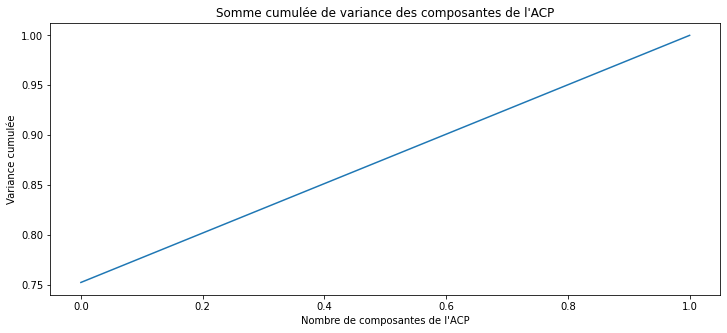

In [17]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))


In [20]:
np.cumsum(pca.explained_variance_ratio_)[1]

0.9999999999999999

avec 19 features on a 93 % de la variance totale

In [ ]:
colonnes_pca = X.columns

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1) 

In [ ]:
x_show = pca.transform(X.select_dtypes(['float64','int32']))[:,0]

y_show = pca.transform(X.select_dtypes(['float64','int32']))[:,1]

z_show = pca.transform(X.select_dtypes(['float64','int32']))[:,2]

In [ ]:
X_pca = pca.transform(X)[:,:19]

In [ ]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1) 


In [ ]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les composantes 1 et 3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)
sns.set_context("paper", font_scale=1) 


In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour composantes 2 et3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 2')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = y_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1) 


## T-SNE

utilisons l'algorithme T-SNE pour avoir une idée en première approche du nombre de groupes homogènes

In [ ]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_pca.copy())

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

## Kmeans

### Premier essai

In [ ]:
kmeans = KMeans(n_clusters=5, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_pca)

In [ ]:
kmeans.labels_

### Recherche d'un optimum du nombre de clusters

NB : intertia = Sum of squared distances of samples to their closest cluster center.


#### 1 sample

In [ ]:
inertia = {}
dict_kmeans = {}
for k in range(1,25):
    print(k)
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

#### n samples

In [ ]:
inertia = {}
dict_kmeans = {}

nb_boucles=3
max_clusters = 25

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i,
                       verbose=1,
                       n_jobs=-1).fit(X_pca)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans[k,i] = kmeans

In [ ]:
chaine = 'Kmeans: Comparaison de la somme des inerties en fonction du\nnombre de clusters (' + str(nb_boucles) + ' itérations)'
plt.figure(figsize=(8,5))
plt.title(chaine)
for i in range(0,nb_boucles):
    index_plot = [cluster+i*(max_clusters) for cluster in list(range(0,max_clusters))][0:max_clusters]
    sous_liste = [list(inertia.values())[index] for index in index_plot]
    sns.lineplot(list(range(0,max_clusters)),
                 sous_liste, alpha=1/nb_boucles, color='grey')

#### Coefficient de silhouette

In [ ]:
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_pca,
                                             labels= list(dict_kmeans[(1,i)].labels_))

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

In [ ]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

In [ ]:
nb_clusters

#### Indice de Davies Bouldin

In [ ]:

davies_bouldin_kmeans = {}
for i in range(2,max_clusters):
    davies_bouldin_kmeans[i] = davies_bouldin_score(X = X_pca,
                                             labels= list(dict_kmeans[(1,i)].labels_))

In [ ]:
nb_clusters

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Davies Bouldin Score moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(davies_bouldin_kmeans.keys()),
               y = list(davies_bouldin_kmeans.values()))
plt.show()

In [ ]:
for key, value in davies_bouldin_kmeans.items():
    if value == min(davies_bouldin_kmeans.values()):
        print('lescore de Davies Bouldin est minimal pour {} clusters (score = {})'.format(key, value))

### Représentation

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (14 clusters)')
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans[(1,14)].labels_,
                legend='full',
               palette=sns.color_palette("Spectral",as_cmap=True))

## DBScan 

### Application

In [1]:
from sklearn.cluster import DBSCAN

In [2]:
dbs = DBSCAN(eps = 1, 
             min_samples=5,
               n_jobs=-1).fit(X_pca.copy())

NameError: name 'X_pca' is not defined

### Représentation des variables

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)

## Clustering Hiérarchique

In [ ]:
nb_clusters_agg = nb_clusters

In [ ]:
cah = AgglomerativeClustering(n_clusters = nb_clusters_agg
                             ).fit(X_pca.copy())

In [ ]:
graph = pd.DataFrame(data = [T[:,0], T[:,1], dict_kmeans[(1,11)].labels_]).T
graph.columns = ['X', 'Y', 'label_kmeans']

In [ ]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

In [ ]:
graph

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Représentation de la séparation des données du CAH via T-SNE')
sns.scatterplot(graph['X'], 
                graph['Y'], 
                hue = cah.labels_, 
                legend='full',
               palette=sns.color_palette("hls",nb_clusters_agg))
plt.legend(loc='upper left', labels=graph['label_kmeans'].unique())
plt.show()

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP\
 du clustering CAH"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = cah.labels_,
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 


In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP \
du clustering KMeans"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label_kmeans'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 


In [ ]:
silhouette_score(X = X_pca, labels= cah.labels_)

## Conclusion

Le Kmeans semble mieux fonctionner que les autres méthodes de clustering, essayons d'appliquer cet algorithme à l'ensemble du jeu de données.


# Ensemble du jeu de données

## Préparation jeu de donnée complet

In [ ]:
X_tot=data.copy()

categorical_columns = X_tot.select_dtypes(['category','object']).columns
numerical_columns = X_tot.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X_tot[numerical_columns] = ss.fit_transform(X_tot[numerical_columns])
ohe.fit(X_tot[categorical_columns])

In [ ]:
X_tot = pd.merge(X_tot[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_tot[categorical_columns])).set_index(X_tot.index),
        left_index = True, right_index = True)

## ACP

In [ ]:
pca_tot = PCA(random_state=1)

In [ ]:
pca_tot.fit(X_tot)

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X_tot.shape[1])),
         np.cumsum(pca_tot.explained_variance_ratio_))


In [ ]:
np.cumsum(pca_tot.explained_variance_ratio_)[18]

On a  94 % de variance avec 19 features

In [ ]:
X_pca_tot = pca_tot.transform(X_tot)[:,:18]

In [ ]:
colonnes_pca = X_tot.columns

## Représentation des données

In [ ]:
x_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,0]

y_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,1]

z_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,2]

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)


i = 0
'''for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5+np.random.randint(-10,10)), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)'''


sns.set_context("paper", font_scale=1) 


## KMeans

Modèle KMeans avec le nombre de clusters optimal identifié sur le jeu de données réduit

In [ ]:
kmeans = KMeans(n_clusters=14, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_pca_tot)

In [ ]:
kmeans.labels_.shape

In [ ]:
silhouette_score(X = X_pca_tot, labels= kmeans.labels_)

In [ ]:
inertia = {}
dict_kmeans = {}
dict_silhouette = {}
for k in range(13,16):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca_tot)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    dict_silhouette[k] = silhouette_score(X = X_pca_tot, labels= kmeans.labels_)
    print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))
    

In [ ]:
if False:
    inertia = {}
    dict_kmeans = {}
    dict_silhouette = {}
    for k in range(3,15):
        kmeans = KMeans(n_clusters=k,
                       verbose=1,
                       random_state=0,
                       n_jobs=-1).fit(X_pca_tot)
        inertia[k] = kmeans.inertia_
        dict_kmeans[k] = kmeans
        dict_silhouette[k] = silhouette_score(X = X_pca_tot, labels= kmeans.labels_)
        print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))
    

* Boucle 13 - Silhouette score : 0.22938337882766385
* Boucle 14 - Silhouette score : 0.2380033975405801
* Boucle 15 - Silhouette score : 0.14908158723434908


In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(dict_silhouette.keys()),
               y = list(dict_silhouette.values()))
plt.show()

Le coefficient de silhouette est maximal pour 14 clusters

## Exports

Exportons notre modèle et notre jeu de données

In [ ]:
#export kmeans
filename = 'models/kmeans_14_full_dataset.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(dict_kmeans[14], filehandler)

In [ ]:
#export OHE
filename = 'ohe.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export SS
filename = 'models/ss.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(ss, filehandler)
    
#export modèle PCA
filename = 'models/pca_tot.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(pca_tot, filehandler)

### Import

In [ ]:
file = open('kmeans_14_full_dataset.obj', 'rb')
model = pickle.load(file)

## Représentation des variables 

In [ ]:
nb_clusters = 14
if False:
    tsne = TSNE(n_components=2)
    T = tsne.fit_transform(X_pca_tot.copy())
    graph = pd.DataFrame(data = [T[:,0], T[:,1], model.labels_]).T
    graph.columns = ['X', 'Y', 'label']
    plt.figure(figsize=(10,10))
    plt.title('Représentation de la séparation des données du KMEANS via T-SNE')
    sns.scatterplot(graph['X'], graph['Y'], hue = graph['label'], legend='full',
                   palette=sns.color_palette("hls",14),
                    alpha=1, s=15,)
    plt.legend(loc='upper left', labels=graph['label'].unique())
    plt.show()
    
else:
        graph = pd.DataFrame(data = [model.labels_]).T
        graph.columns = ['label']


In [ ]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 


In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x = graph['label'].value_counts().index, 
           y=graph['label'].value_counts().values/len(graph)*100)

## Caractérisation des clusters 

### Représentation

In [ ]:
graph.sample(10)

In [ ]:
X2=X_tot.copy()

In [ ]:
X2.shape

In [ ]:
X2['label'] = graph['label']
group_columns = X2.groupby('label').mean()

### Répartition par feature 

In [ ]:
X_tot_2 = data.copy()
X_tot_2['label'] = model.labels_

In [ ]:
X_tot_2.head(2)

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = X_tot_2, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

Observation du mode des différents clusters pour chaque feature

In [ ]:
X_tot_2.groupby('label').agg(lambda x:x.value_counts().index[0])

In [ ]:
X_tot_2.groupby('label').agg('mean')

In [ ]:
X_tot_2.groupby('label').agg('mean')['delai_dernier_achat'].tolist()

Observations : 

* Le cluster 9 correspond aux clients qui ont acheté le plus de produits et aux acheteurs majoritaires de la catégorie 'home'
* le cluster 3 correspond au client qui ont un long délai de traitement de leur commande et également à ceux qui mettent les plus mauvaises notes en moyenne. Ils ne sont pas attachés à une catégorie de produit en particulier
* le cluster 6 correspond au client qui ont fait leur commande le plus récemment et aux acheteurs majoritaires de la catégorie 'construction'
* Le cluster 11 correspond aux acheteurs majoritaires de la catégorie 'appliances' 
* Le cluster 4 correspond aux acheteurs majoritaires de la catégorie  'office'
* Le cluster 13 correspond aux acheteurs majoritaires de la catégorie 'electronics'
* Le cluster 2 correspond aux acheteurs majoritaires de la catégorie 'arts
* Le cluster 0 correspond aux acheteurs majoritaires de la catégorie 'fashion' 
* Le cluster 8 correspond aux acheteurs majoritaires de la catégorie 'health/beauty' 
* Le cluster 1 correspond aux acheteurs majoritaires de la catégorie 'sports_leisure'
* Le cluster 12 correspond aux acheteurs majoritaires de la catégorie 'garden_pets'
* Le cluster 10 correspond aux acheteurs majoritaires de la catégorie 'auto'
* Le cluster 7 correspond aux acheteurs majoritaires de la catégorie 'other'
* pas de catégorie spécifique d'achat identifiée pour le cluster 5 (cluster qui comprend la moitié de notre échantillon)


Premier bilan:
* des clusters d'acheteurs potentiels pour certaines catégories de produits ont été identifiés
* les clients avec un long délai de traitement de commande, qui menttent de moins bonnes notes en moyenne, ont été identifiés
* le cluster des clients qui achète le plus de produits en quantité a également été identifié

Peut-on aller plus loin?

### latitude et longitude

In [ ]:
graph.columns

In [ ]:
graph['label'].nunique()

In [ ]:
graph['colors']=pd.cut(graph['label'], bins=nb_clusters, 
                       labels=['red', 'blue', 'green', 'purple', 
                               'orange', 'darkred', 'lightred', 'beige', 
                               'darkblue', 'darkgreen', 'cadetblue', 'darkpurple',
                               'pink','black'])

In [ ]:
len(graph)

In [ ]:

if False:
    n = folium.Map()
    n = folium.Map(location=[data['geolocation_lat'].mean().mean(), data['geolocation_lng'].mean().mean()],
                   zoom_start=11)
    for i in range(0,20000):    
        folium.Circle([data.iloc[i]['geolocation_lat'],data.iloc[i]['geolocation_lng']],
                      popup=graph.iloc[i]['label'], 
                      color = graph.iloc[i]['colors']
                      ,radius =500).add_to(n)

Bilan : on n'observe pas de tendance nette sur la localisation des points : regroupement des groupes par quartier ou autre.

# Essai de Kmeans en supprimant des features

Peut-on obtenir un autre clustering (éventuellement avec une répartition plus homogène des tailles de clusters) en supprimant des features

In [ ]:
X_tot.head()

In [ ]:
features_to_drop = ['Delai_Moy_Commande',
                    'heure_achat',
                    'Facilités',
                    'jour_achat', 
                    'Note_Moy_Com']
X_reduce = X_tot.drop(features_to_drop, axis=1)

In [ ]:
X_reduce.head()

In [ ]:
pca_reduce = PCA(random_state=1)
pca_reduce.fit(X_reduce)

In [ ]:
np.cumsum(pca_reduce.explained_variance_ratio_)[14]

In [ ]:
X_pca_reduce = pca_reduce.transform(X_reduce)[:,:14]

In [ ]:
kmeans_reduce = KMeans(n_clusters=14, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_reduce)

In [ ]:
silhouette_score(X = X_pca_reduce, labels= kmeans_reduce.labels_)

In [ ]:
sns.barplot(y = pd.Series(kmeans_reduce.labels_).value_counts().values,
           x = pd.Series(kmeans_reduce.labels_).value_counts().index)

taille des clusters

In [ ]:
pd.DataFrame(kmeans_reduce.labels_, columns=['cluster'])['cluster'].value_counts().sort_values()

In [ ]:
X_tot_2['label_reduce'] = kmeans_reduce.labels_

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label_reduce',
                    y = column,
                    data = X_tot_2, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

Le Kmeans réduit semble réaliser un clustering comparable : on observe les mêmes features qui se détachent en fonction des catégories (catégories de dépenses, nombre d'achats, etc.)

# Résultats et problématique

Les résultats ne sont pas parfaitement satisfaisants vis à vis de la problématique:  
* on obtient un trop grand nombre de clusters, non adapté à la problématique business
* un cluster principal qui contient trop de données
* coefficient de silhouette relativement faible indiquant un chevauchement partiel des clusters,
* le clustering suit principalement les catégories de produits prédéfinies. On aurait pu faire ce tri sans faire appel à des algorithmes 

La base de données permet de faire difficilement mieux par des algorithmes traditionnels car peu de clients ont fait plusieurs achats, ce qui limite le nombre de possibilités qu'on peut envisager (fréquence des achats, complémentarité des catégories d'achats, date du dernier achat, etc.)

Revenons à une analyse manuelle des données pour identifier des segments exploitables pour les équipes marketing

## Clusters actionnables

**Identification des clusters**

In [ ]:
X3 = pd.DataFrame(X_pca_tot, index = data.index)

In [ ]:
cluster = []
for i in range(14):
    cluster.append(data.loc[X_tot_2['label'] == i])

Nombre de clients par cluster

In [ ]:
a = 0
for i in range(14):
    b = cluster[i].shape[0]
    a += b
    print('cluster {} : {} clients'.format(i,b))

la catégorie 5 contient trop de clients et est difficilement exploitable directement. Peut-on la redécouper?

### Clustering de la catégorie 5

In [ ]:
dict_silhouette_cat5 = {}
dict_kmeans_cat5 = {}
for i in range(2,15,1):
    dict_kmeans_cat5[i] = KMeans(n_clusters=i, 
                    verbose=1, 
                    random_state=0,
                   n_jobs=-1).fit(X3.loc[X_tot_2[X_tot_2['label'] == 5].index])
    dict_silhouette_cat5[i] = (silhouette_score(X = X3.loc[X_tot_2[X_tot_2['label'] == 5].index],
                         labels= list(dict_kmeans_cat5[i].labels_)))

In [ ]:
dict_silhouette_cat5

Ce sous clustering n'est pas concluant

### Les clients les plus dépensiers

In [ ]:
recap = X_tot_2.drop(['Nb_pdts', 'Tot_moy_achats', 'Delai_Moy_Commande',
       'order_purchase_timestamp', 'heure_achat', 'jour_achat',
       'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités',
       'geolocation_lat', 'geolocation_lng','label_reduce'], axis=1).groupby('label').sum()

In [ ]:
recap.columns

In [ ]:
recap = pd.DataFrame(recap)

In [ ]:
recap['count'] = X_tot_2.groupby('label').count().mean(axis=1)

Clusters les plus dépensiers : Clusters 9 et 13
il s'agit des catégories qui dépensent le plus dans les catégories "home" et "electronics"

In [ ]:
cluster[9].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
cluster[13].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
for i in [9,13]:
    print('Nombre clients cluster ',i,': ', cluster[i].shape[0])

### Les clients les moins dépensiers

Cluster 5 : les moins dépensiers et qui ont le moins recours aux facilités de paiement => opportunité de leur faire des offres sur les facilités de paiement

In [ ]:
cluster[5].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
print('Nombre clients cluster ',5,': ', cluster[5].shape[0])

### Les clients qui ont acheté le plus grand nombre de produits

Cluster 12 : ils mettent en moyenne une moins bonne note

In [ ]:
cluster[9].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
print('Nombre clients cluster ',9,': ', cluster[9].shape[0])

### Les longs délais de livraison

Cluster 3 : ceux qui ont eu un long délai de commande et mettent des mauvaises notes => leur proposer une livraison rapide pour améliorer leur expérience

In [ ]:
cluster[3].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
print('Nombre clients cluster ',3,': ', cluster[3].shape[0])

### Les très longs délais de livraison (> 1 mois)

In [ ]:
cluster[3][cluster[3]['Delai_Moy_Commande']>30].describe()

In [ ]:
cluster[3][cluster[3]['Delai_Moy_Commande']>30].shape

### Les catégories les plus achetées

**les catégories les plus achetées:**

In [ ]:
liste_col = [('price', 'home'), ('price', 'appliances'),
       ('price', 'construction'), ('price', 'office'),
       ('price', 'electronics'), ('price', 'arts'), ('price', 'fashion'),
       ('price', 'health_beauty'), ('price', 'sports_leisure'),
       ('price', 'garden_pets'), ('price', 'auto'),
       ('price', 'food_drinks'), ('price', 'other')]
dict_val = {}
for column in liste_col:
    dict_val[str(column).split("'")[3]] = data[str(column)].sum()/data.shape[0]

plt.figure(figsize=(8,5))
plt.title('Montant moyen de dépense par catégorie de produit')
sns.barplot(y = 'index',
            x='price',
            data = pd.DataFrame(dict_val, index=['price']).T.reset_index().sort_values(by='price', ascending=False))

In [ ]:
cluster[11].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
cluster[7][cluster[7]['Nb_pdts']>2].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
cluster[7][cluster[7]['Nb_pdts']>2].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
for i in range(13):
    print('Nombre clients cluster ',i,': ', cluster[i].shape[0])

### Les clients ayant acheté le plus de produits

In [ ]:
data[data['Nb_pdts'] >=4].shape

In [ ]:
data.loc[data[data['Nb_pdts'] >=2].index].shape

### Les clients les plus satisfaits de leurs produits

In [ ]:
data['Note_Moy_Com'].describe()

In [ ]:
data[data['Note_Moy_Com']==5].shape

In [ ]:
data.head()

In [ ]:
data.loc[data[data['Nb_pdts'] >=2].index].shape

### clients les moins satisfaits de leurs produits

In [ ]:
data[data['Note_Moy_Com']==1].shape

### clustering des clients qui consomment le plus

In [ ]:
X3 = pd.DataFrame(X_pca_tot, index = data.index)

Sélection des clients qui ont acheté plus de 4 produits

In [ ]:
dict_silhouette = {}
dict_kmeans_consumers = {}
for i in range(3,15,1):
    dict_kmeans_consumers[i] = KMeans(n_clusters=i, 
                    verbose=1, 
                    random_state=0,
                   n_jobs=-1).fit(X3.loc[data[data['Nb_pdts'] >=4].index])
    dict_silhouette[i] = (silhouette_score(X = X3.loc[data[data['Nb_pdts'] >=4].index],
                         labels= list(dict_kmeans_consumers[i].labels_)))

In [ ]:
dict_silhouette

In [ ]:
print(max(dict_silhouette.values()))

In [ ]:
list(dict_silhouette.keys())[list(dict_silhouette.values()).index(max(dict_silhouette.values()))]

In [ ]:
X_most_imp_cat = data.copy()[data['Nb_pdts'] >=4]
X_most_imp_cat['label'] = dict_kmeans_consumers[8].labels_

In [ ]:
X_most_imp_cat.shape

cela représente 4600 clients potentiels

In [ ]:
for column in X_most_imp_cat.drop(['order_purchase_timestamp', 'heure_achat', 'jour_achat', 'label'], axis=1).columns:
    plt.figure(figsize=(7,5))
    titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
    plt.title(titre)
    sns.barplot(x = 'label',
                y = column,
                data = X_most_imp_cat, 
                ci="sd")
    plt.show()

In [ ]:
X_most_imp_cat.shape

La différence entre les clusters se fait principalement par les catégories de dépense:
* les individus du cluster 1 a dépensé en moyenne 1200 en produit 'home'
* les individus du  du cluster 3 ont dépensé en moyenne plus de 370 dans la catégorie 'appliances'
* les individus du cluster 5 ont dépensé en moyenne 600 dans la catégorie electronics
* les individus du cluster 0 ont dépensé en moyenne 600 dans la catégorie health/beauty
* les individus du cluster 6 ont dépensé en moyenne 350 dans la catégorie fashion
* les individus du cluster 7 ont dépensé en moyenne 400 dans la catégorie sport/leisure
* les individus du cluster 2 ont dépensé en moyenne plus de 400 dans la catégorie "garden" / pets
* les individus du cluster 4 ont dépensé en moyenne 300 dans la catégorie 'home' 

on peut par exemple cibler prioritairement ces clients pour des publicités de produits des catégories indiquées ci-dessus

Certaines catégories de produits séduisent davantage de catégories de clients que d'autres, c'est notamment le cas des catégories home, electronics et health beauty qui ont des acheteurs dans tous les clusters. Il y a un levier potentiellement exploitable pour rediriger les clients des autres catégories vers ces catégories

# Caractérisation évolution dans le temps  

* Idée : on pourrait réduire les données en retirant les derniers mois de données et voir si les clusters évoluent ou non : si oui cela veut dire qu’il faut actualiser sur une période de temps plus faible
* Essayer en isolant une région ou autre variable pour voir si le cluster est robuste ou non


In [ ]:
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype('datetime64')

In [ ]:
data['order_purchase_timestamp'].describe()

Pour voir si le clustering est stable:
* on va retirer du jeu de données tous les clients dont le dernier achat date d'il y a moins de n mois avec différents pas

In [ ]:
X_tot

## Préparation jeu de données

Faisons un test de clustering en retirant les 3 derniers mois du jeu de données (test de faisabilité en retirant tous les clients qui ont fait un achat dans les 3 derniers mois)

In [ ]:
data['order_purchase_timestamp'].max()

In [ ]:
data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].shape

In [ ]:
X_old = data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].copy()

In [ ]:
categorical_columns = X_old.select_dtypes(['category','object']).columns
numerical_columns = X_old.select_dtypes(['int32','float64']).columns


X_old[numerical_columns] = ss.transform(X_old[numerical_columns])
ohe.fit(X_old[categorical_columns])

In [ ]:
X_old = pd.merge(X_old[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_old[categorical_columns])).set_index(X_old.index),
        left_index = True, right_index = True)

## ACP

In [ ]:
X_pca_old = pca_tot.transform(X_old)[:,:18]

## Kmeans

In [ ]:
inertia = {}
dict_kmeans = {}
dict_silhouette = {}
for k in range(5,20):
    kmeans_old = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca_old)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    dict_silhouette[k] = silhouette_score(X = X_pca_old, labels= kmeans_old.labels_)
    print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))
    

Le nombre de clusters qui maximise le coefficient de silhouette est toujours 14. Sa valeur est comparable à celle obtenue pour le jeu complet

## Représentation

In [ ]:
X_old.shape

In [ ]:
kmeans_old.labels_.shape

In [ ]:
X_tot_old = data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].copy().copy()
X_tot_old['label'] = kmeans_old.labels_

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = X_tot_old, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

On constate que les différentes observations constatées dans le précédent clustering sont conservées, notamment:
* cat 8 : les plus dépensiers pour home et ceux qui ont acheté le plus de produits
* cat 3 : les 2e plus dépensiers et les plus dépensiers dans la catégorie électronics
* cat 2 : délai moyen de commande plus élevé que les autres et moyenne de notes commentaires plus basse que la moyenne
* pour le reste les catégories semblent représentées de façon similaire


On constate par contre que différentes valeurs évoluent sensiblement comme les notes moyennes de commentaires (de 3,1 à 3,4 par exemple pour la catégorie la moins satisfaite).
On peut 